# Спецификация к Лабораторной работе №7 

# Упорядочение массива методами простого выбора и «пузырька».

# (Вариант 22)

## Абстракция А0
### 1. Постановка задачи.
#### Задание: 
Написать программы упорядочения одномерного массива двумя методами: 
    
- методом простого выбора и 

- методом «пузырька».

#### Условие: 
Заданный целочисленный массив $\{A_1, A_2, …, A_n\}$ отсортировать в порядке убывания (минимум - в конец). 

Порядок элементов выводить на экран после каждого прохода по массиву.

### 2. Уточненная постановка задачи.
Дан одномерный целочисленный массив A из n элементов.

1) Выполнить сортировку методом простого выбора: 

на каждом i-ом этапе сортировки поменять местами 

- минимальный элемент массива $\{A_1, A_2, …, A_{n - i + 1}\}$ с индексом k и 

- элемент с индексом (n - i + 1).

2) Выполнить сортировку методом "пузырька": 

- на очередном этапе сравниваются все соседние элементы, 

- в каждой паре элементы меняются местами, если первый элемент меньше второго,

- последний элемент полученного массива исключается из анализа на следующем этапе.

### 3. Пример с иллюстрацией.

In [85]:
import numpy
import pylab 
%matplotlib inline
pylab.style.use('seaborn-whitegrid')

In [98]:
A1 = numpy.random.randint(-100,100, size=20)
numpy.savetxt('A_Lab7_1.txt', A1, fmt='%5.0f')
B1 = numpy.sort(A1)[::-1]
str(list(A1)), str(list(B1))

('[-22, 30, 73, 64, -98, 15, 67, -26, 92, 49, 46, 72, -19, 74, 2, 43, -68, 7, 3, -43]',
 '[92, 74, 73, 72, 67, 64, 49, 46, 43, 30, 15, 7, 3, 2, -19, -22, -26, -43, -68, -98]')

In [113]:
# A_Lab7_1.txt, A_Lab7_2.txt, A_Lab7_3.txt, A_Lab7_4.txt, A_Lab7_5.txt
# As_Lab7_1.txt, As_Lab7_2.txt, As_Lab7_3.txt, As_Lab7_4.txt, As_Lab7_5.txt

print(20*' ' + 'Лаб.7\n' + 90*'=')

fin = str(input('Текстовый файл с элементами массива A: '))
fout = str(input('Текстовый файл с элементами массива A и индексом максимального значения: '))

with open(fin, 'r') as f:
    A = numpy.array([int(x) for x in f.readlines()])
    
with open(fout, 'w') as f:
    f.write("{}\n".format(A))
    
method = str(input('Выберете метод сортировки массива A (simple или bubble): '))
    
print(90*'=' + '\n' + 'Сортировка массива A: \n')

def simple_sort(A):
    for j in range(len(A)-1):
        print(j)
        print(A)
        MIN, k = A[len(A)-j-1], -1
        for i in range(len(A)-j-2, -1, -1):
            if MIN > A[i]: 
                MIN = A[i]
                k = i
        if k > -1:
            A[k] = A[len(A)-j-1]
            A[len(A)-j-1] = MIN

def bubble_sort(A):
    for j in range(len(A)-1):
        print(A)
        c = 0
        for i in range(len(A)-j-1):
            if A[i] < A[i+1]: 
                MIN = A[i]
                A[i] = A[i+1]
                A[i+1] = MIN
                c += 1
        if c < 1:  break
            
if method == 'simple': 
    simple_sort(A)  
elif method == 'bubble': 
    bubble_sort(A)   
else: 
    print('Неправильный ввод названия метода сортировки')

with open(fout, 'w') as f:
    f.write("{}".format(A))

                    Лаб.7
Текстовый файл с элементами массива A: A_Lab7_1.txt
Текстовый файл с элементами массива A и индексом максимального значения: As_Lab7_1.txt
Выберете метод сортировки массива A (simple или bubble): bubble
Сортировка массива A: 

[-22  30  73  64 -98  15  67 -26  92  49  46  72 -19  74   2  43 -68   7
   3 -43]
[ 30  73  64 -22  15  67 -26  92  49  46  72 -19  74   2  43 -68   7   3
 -43 -98]
[ 73  64  30  15  67 -22  92  49  46  72 -19  74   2  43 -26   7   3 -43
 -68 -98]
[ 73  64  30  67  15  92  49  46  72 -19  74   2  43 -22   7   3 -26 -43
 -68 -98]
[ 73  64  67  30  92  49  46  72  15  74   2  43 -19   7   3 -22 -26 -43
 -68 -98]
[ 73  67  64  92  49  46  72  30  74  15  43   2   7   3 -19 -22 -26 -43
 -68 -98]
[ 73  67  92  64  49  72  46  74  30  43  15   7   3   2 -19 -22 -26 -43
 -68 -98]
[ 73  92  67  64  72  49  74  46  43  30  15   7   3   2 -19 -22 -26 -43
 -68 -98]
[ 92  73  67  72  64  74  49  46  43  30  15   7   3   2 -19 -22 -26 -43
 -68 -98]


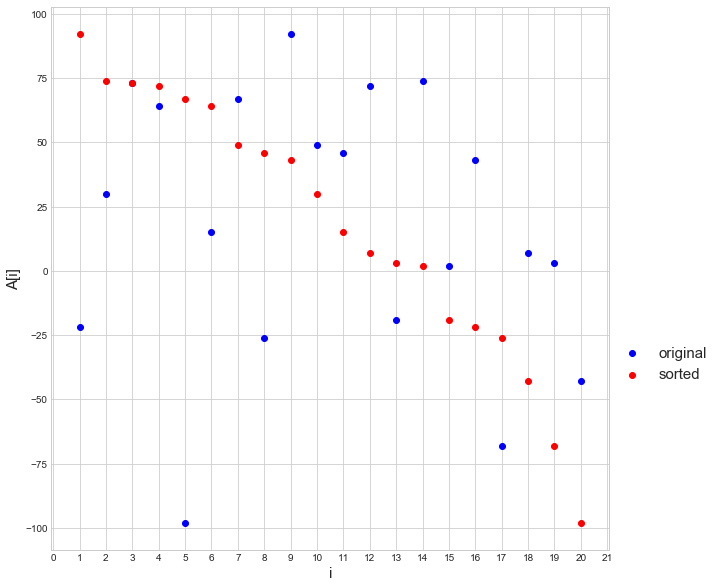

In [114]:
pylab.figure(figsize=(10,10))
pylab.scatter(range(len(A1)), A1, c='b', label='original')
pylab.scatter(range(len(A1)), B1, c='r', label='sorted')

pylab.xlabel('i', fontsize=15) 
pylab.ylabel('A[i]', fontsize=15)
pylab.xticks(range(-1, len(A)+1), range(len(A)+2));
pylab.legend(fontsize=15, shadow=True, bbox_to_anchor=(1.2,0.4));

### 4. Таблица данных 

| Класс | Имя | Описание (смысл, диапазон, точность) | Тип | Структура | Формат в/в |
| :-: | :-: | :-: | :-: | :-: | :-: |
| входные данные | fin | название текстового файла с элементами массива А | символ | строка | "+XX.txt" |
| входные данные | fout | название текстового файла с элементами массива А | символ | строка | "+XX.txt" |
| входные данные | method | название метода сортировки массива А | символ | строка | "+XX" |
| входные данные | A | вводимые из текстового файла числа исходного массива | цел | одномерный массив | +XX (:5) |
| выходные данные | A | выводимые в текстовый файл числа сортированного массива | цел | одномерный массив | +XX (:5) |
| промежуточные данные | MIN | минимальный элемент при сортировке | цел | простая переменная | --- |
| промежуточные данные | i | индекс текущего элемента, 1≤i≤50 | цел | простая переменная | --- |
| промежуточные данные | j | индекс текущего элемента, 1≤j≤50 | цел | простая переменная | --- |
| промежуточные данные | c | подсчет количества перестановок элементов, 0≤c≤49 | цел | простая переменная | --- |

_! в Delphi выход из цикла с 1 до 20 с шагом +1 происходит при значении 21, из цикла с 20 до 1 – при 0_

### 5. Входная форма
- обр 1.1 Текстовый файл с элементами массива A: $<fin>$       
- обр 1.2 Текстовый файл с элементами массива A и индексом максимального значения: $<fout>$
- обр 2 Выберете метод сортировки массива A (simple или bubble): $<method>$
- обр 3.1 Сортировка массива A:
- обр 3.2 $ < A[1] >  < A[2] >  …  < A[n] > $

### 6. Выходная форма

- обр 4 Лаб. 7
- обр 5.1 Текстовый файл с элементами массива A: $<fin>$       
- обр 5.2 Текстовый файл с элементами массива A и индексом максимального значения: $<fout>$
- обр 6 Выберете метод сортировки массива A (simple или bubble): $<method>$
- обр 7.1 Сортировка массива A:
- обр 7.2 $ < A[1] > < A[2] > … < A[n] > \\ ... \\ < A[1] > < A[2] > … < A[n] > $

### 7. Аномалии

-